In [2]:
from sklearn.linear_model import LinearRegression#libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error


In [3]:
prop = pd.read_csv('Q1_property.csv', sep=';')#storing csv file
display(prop)#displaying csv file

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,3,07-24-2019,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,2,07-24-2019,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,G-10,Islamabad,Islamabad Capital,33.676104,73.013842,6,1 Kanal,For Rent,6,07-24-2019,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,2.7 Marla,For Rent,2,07-24-2019,New National Properties,TALHA MIAN AHMAD


# Pre proccessing

In [4]:
print(prop.dtypes)#Ensuring the validation and correction of any inconsistent data formats.

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
dtype: object


In [5]:
display(prop.isnull())#Identifying and address missing values in the dataset.

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
191389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
191390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
191391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
prop.fillna(prop.median(numeric_only=True), inplace=True)#Identify and address missing values in the dataset.

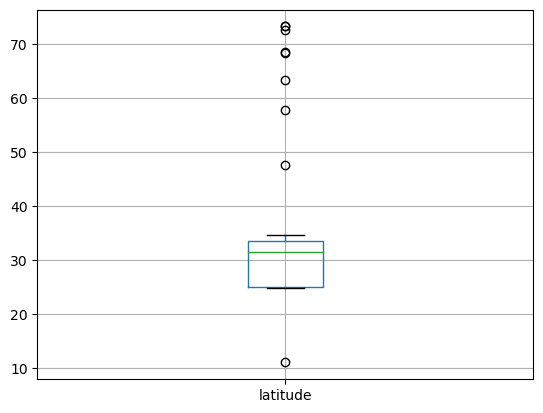

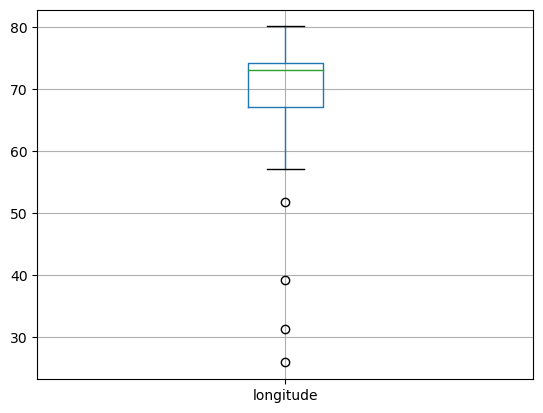

In [7]:
Q1 = prop.quantile(0.25, numeric_only=True)#Identifying and manage potential outliers within the data.
Q3 = prop.quantile(0.75, numeric_only=True)  
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
prop, lower_bound = prop.align(lower_bound, axis=1, copy=False)
prop, upper_bound = prop.align(upper_bound, axis=1, copy=False)
outliers = (prop < lower_bound) | (prop > upper_bound)
prop_outliers = prop[outliers.any(axis=1)]
prop.boxplot(column=['latitude'])
plt.show()
prop.boxplot(column=['longitude'])
plt.show()

In [8]:
def replace_outliers(dataframe, outliers):#function for replacing outliers with median values
    for column_name in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column_name]):
            column_mean = dataframe[column_name].median()
            dataframe.loc[outliers[column_name], column_name] = column_mean
    return dataframe
prop= replace_outliers(prop,outliers)

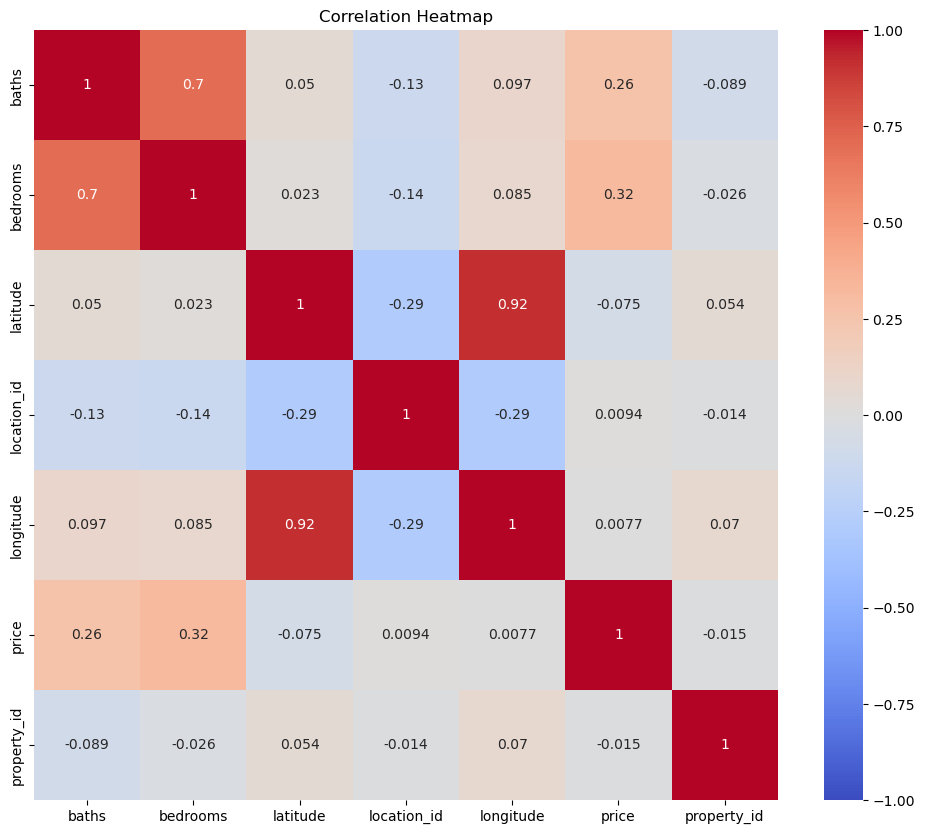

In [9]:
corr_matrix = prop.corr(numeric_only=True)#correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There is a high positive correlation between the number of baths and the number of bedrooms. This can mean that properties with more bedrooms tend to have more baths.
There is a low correlation is between 'Location_ID' and 'Latitude'.This correlation can mean that there is a weak tendency for 'Location_ID' and 'Latitude' to move in opposite directions: as one increases, the other tends to decrease, and vice versa.

In [10]:
average_price = prop.groupby('agent')['price'].mean().reset_index()#grouping agent by price. This gets us the average price of each specific agents propert which he/she has sold
average_price.columns = ['agent', 'average_price']
numofproperties = prop.groupby('agent').size().reset_index()#now we group the DataFrame prop by the 'agent' column and calculate size of each group
numofproperties.columns = ['agent', 'num_properties']
merged_data = pd.merge(average_price, numofproperties, on='agent')
corr_coff = merged_data['average_price'].corr(merged_data['num_properties'])# merge operation between two DataFrames, average_price and numofproperties
print(f"Correlation Coefficient of number of properties listed by an agent and avaerage price is low positive: {corr_coff}")#calculating correlaion coefficient

Correlation Coefficient of number of properties listed by an agent and avaerage price is low positive: -0.039645901272693455


In [11]:
display(prop['area'])#displaying the area column. It is in marlas and kanals

0            6 Kanal
1            1 Kanal
2            9 Marla
3            1 Kanal
4           11 Marla
             ...    
191388    12.4 Marla
191389    12.4 Marla
191390       1 Kanal
191391     2.7 Marla
191392       0 Marla
Name: area, Length: 191393, dtype: object

In [12]:
def area_into_sqm(value):#making a function to convert marlas and kannals into square meter
    if isinstance(value, str):
        if 'Kanal' in value:
            return float(value.split(' ')[0].replace(',', '')) * 5445.24 
        elif 'Marla' in value:
            return float(value.split(' ')[0].replace(',', '')) * 20.9  
        else:
            return float(value) 
    elif isinstance(value, float):
        return value 
    else:
        return float(value)
prop['area'] = prop['area'].apply(area_into_sqm)#applying above mentioned function of the area column of the prop data frame

# Create a new column 'price_per_sqm'
prop['price_per_sqm'] = prop['price'] / prop['area']#calculating price per square meter

# Display the result
display(prop)#dispalying prop with converted area column and a new column showing price per square meter

,agency,agent,area,baths,bedrooms,city,date_added,latitude,location,location_id,longitude,page_url,price,property_id,property_type,province_name,purpose,price_per_sqm
0,Real Biz International,Usama Khan,32671.44,0,0,Lahore,07-17-2019,31.483869,Model Town,8,74.325686,https://www.zameen.com/Property/lahore_model_t...,7300000,16763851,House,Punjab,For Sale,2.234367e+02
1,Khan Estate,mohsinkhan and B,5445.24,5,5,Lahore,10-06-2018,31.431593,Multan Road,48,74.179980,https://www.zameen.com/Property/lahore_multan_...,40000000,16763851,House,Punjab,For Sale,7.345865e+03
2,Shahum Estate 2,"Babar Hameed, Raja Omar",188.10,0,3,Lahore,07-03-2019,31.499348,Eden,75,74.416959,https://www.zameen.com/Property/eden_eden_aven...,9500000,16763851,House,Punjab,For Sale,5.050505e+04
3,NaN,NaN,5445.24,7,3,Lahore,04-04-2019,31.522069,Gulberg,3821,74.355512,https://www.zameen.com/Property/gulberg_2_gulb...,7300000,16763851,House,Punjab,For Sale,1.340620e+03
4,NaN,NaN,229.90,5,6,Lahore,04-04-2019,31.506483,Allama Iqbal Town,3522,74.286017,https://www.zameen.com/Property/allama_iqbal_t...,21000000,16763851,House,Punjab,For Sale,9.134406e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,Property World,Zafran,259.16,0,3,Islamabad,07-24-2019,33.668497,I-8,174,73.074160,https://www.zameen.com/Property/islamabad_i_8_...,70000,17468383,Upper Portion,Islamabad Capital,For Rent,2.701034e+02
191389,Property World,Zafran,259.16,0,2,Islamabad,07-24-2019,33.668497,I-8,174,73.074160,https://www.zameen.com/Property/islamabad_i_8_...,40000,17468384,Upper Portion,Islamabad Capital,For Rent,1.543448e+02
191390,Azaan Associates,Usman Rehman,5445.24,6,6,Islamabad,07-24-2019,33.676104,G-10,167,73.013842,https://www.zameen.com/Property/islamabad_g_10...,160000,17468482,House,Islamabad Capital,For Rent,2.938346e+01
191391,New National Properties,TALHA MIAN AHMAD,56.43,2,2,Islamabad,07-24-2019,33.527944,DHA Defence,339,73.161392,https://www.zameen.com/Property/dha_defence_dh...,25000,17468586,Flat,Islamabad Capital,For Rent,4.430268e+02


In [13]:
prop['date_added'] = pd.to_datetime(prop['date_added'])#changing date_added column into date time format
prop['month'] = prop['date_added'].dt.month#getting temporal features from date_added column
prop['quarter'] = prop['date_added'].dt.quarter
prop['day_of_week'] = prop['date_added'].dt.day_name()
display(prop)

,agency,agent,area,baths,bedrooms,city,date_added,latitude,location,location_id,...,page_url,price,property_id,property_type,province_name,purpose,price_per_sqm,month,quarter,day_of_week
0,Real Biz International,Usama Khan,32671.44,0,0,Lahore,2019-07-17,31.483869,Model Town,8,...,https://www.zameen.com/Property/lahore_model_t...,7300000,16763851,House,Punjab,For Sale,2.234367e+02,7,3,Wednesday
1,Khan Estate,mohsinkhan and B,5445.24,5,5,Lahore,2018-10-06,31.431593,Multan Road,48,...,https://www.zameen.com/Property/lahore_multan_...,40000000,16763851,House,Punjab,For Sale,7.345865e+03,10,4,Saturday
2,Shahum Estate 2,"Babar Hameed, Raja Omar",188.10,0,3,Lahore,2019-07-03,31.499348,Eden,75,...,https://www.zameen.com/Property/eden_eden_aven...,9500000,16763851,House,Punjab,For Sale,5.050505e+04,7,3,Wednesday
3,NaN,NaN,5445.24,7,3,Lahore,2019-04-04,31.522069,Gulberg,3821,...,https://www.zameen.com/Property/gulberg_2_gulb...,7300000,16763851,House,Punjab,For Sale,1.340620e+03,4,2,Thursday
4,NaN,NaN,229.90,5,6,Lahore,2019-04-04,31.506483,Allama Iqbal Town,3522,...,https://www.zameen.com/Property/allama_iqbal_t...,21000000,16763851,House,Punjab,For Sale,9.134406e+04,4,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,Property World,Zafran,259.16,0,3,Islamabad,2019-07-24,33.668497,I-8,174,...,https://www.zameen.com/Property/islamabad_i_8_...,70000,17468383,Upper Portion,Islamabad Capital,For Rent,2.701034e+02,7,3,Wednesday
191389,Property World,Zafran,259.16,0,2,Islamabad,2019-07-24,33.668497,I-8,174,...,https://www.zameen.com/Property/islamabad_i_8_...,40000,17468384,Upper Portion,Islamabad Capital,For Rent,1.543448e+02,7,3,Wednesday
191390,Azaan Associates,Usman Rehman,5445.24,6,6,Islamabad,2019-07-24,33.676104,G-10,167,...,https://www.zameen.com/Property/islamabad_g_10...,160000,17468482,House,Islamabad Capital,For Rent,2.938346e+01,7,3,Wednesday
191391,New National Properties,TALHA MIAN AHMAD,56.43,2,2,Islamabad,2019-07-24,33.527944,DHA Defence,339,...,https://www.zameen.com/Property/dha_defence_dh...,25000,17468586,Flat,Islamabad Capital,For Rent,4.430268e+02,7,3,Wednesday


In [14]:
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area', 'price_per_sqm']#stadardising numerical columns
prop.replace([np.inf, -np.inf], np.nan, inplace=True)#replacing nan values
prop.fillna(prop.max(numeric_only=True), inplace=True)
scaler = StandardScaler()
prop[numerical_columns] = scaler.fit_transform(prop[numerical_columns])
display(prop)


,agency,agent,area,baths,bedrooms,city,date_added,latitude,location,location_id,...,page_url,price,property_id,property_type,province_name,purpose,price_per_sqm,month,quarter,day_of_week
0,Real Biz International,Usama Khan,0.249204,-1.269727,-1.747621,Lahore,2019-07-17,0.379486,Model Town,8,...,https://www.zameen.com/Property/lahore_model_t...,-0.164097,16763851,House,Punjab,For Sale,-0.429112,7,3,Wednesday
1,Khan Estate,mohsinkhan and B,0.023688,0.947973,1.113433,Lahore,2018-10-06,0.365117,Multan Road,48,...,https://www.zameen.com/Property/lahore_multan_...,3.093599,16763851,House,Punjab,For Sale,-0.373573,10,4,Saturday
2,Shahum Estate 2,"Babar Hameed, Raja Omar",-0.019858,-1.269727,-0.030988,Lahore,2019-07-03,0.383740,Eden,75,...,https://www.zameen.com/Property/eden_eden_aven...,0.055075,16763851,House,Punjab,For Sale,-0.037024,7,3,Wednesday
3,NaN,NaN,0.023688,1.835053,-0.030988,Lahore,2019-04-04,0.389986,Gulberg,3821,...,https://www.zameen.com/Property/gulberg_2_gulb...,-0.164097,16763851,House,Punjab,For Sale,-0.420401,4,2,Thursday
4,NaN,NaN,-0.019511,0.947973,1.685644,Lahore,2019-04-04,0.385702,Allama Iqbal Town,3522,...,https://www.zameen.com/Property/allama_iqbal_t...,1.200748,16763851,House,Punjab,For Sale,0.281432,4,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,Property World,Zafran,-0.019269,-1.269727,-0.030988,Islamabad,2019-07-24,0.979977,I-8,174,...,https://www.zameen.com/Property/islamabad_i_8_...,-0.884376,17468383,Upper Portion,Islamabad Capital,For Rent,-0.428749,7,3,Wednesday
191389,Property World,Zafran,-0.019269,-1.269727,-0.603199,Islamabad,2019-07-24,0.979977,I-8,174,...,https://www.zameen.com/Property/islamabad_i_8_...,-0.887365,17468384,Upper Portion,Islamabad Capital,For Rent,-0.429651,7,3,Wednesday
191390,Azaan Associates,Usman Rehman,0.023688,1.391513,1.685644,Islamabad,2019-07-24,0.982068,G-10,167,...,https://www.zameen.com/Property/islamabad_g_10...,-0.875410,17468482,House,Islamabad Capital,For Rent,-0.430626,7,3,Wednesday
191391,New National Properties,TALHA MIAN AHMAD,-0.020948,-0.382647,-0.603199,Islamabad,2019-07-24,0.941343,DHA Defence,339,...,https://www.zameen.com/Property/dha_defence_dh...,-0.888860,17468586,Flat,Islamabad Capital,For Rent,-0.427400,7,3,Wednesday


In [15]:
categorical_columns = ['agent', 'agency', 'city', 'location', 'property_type', 'province_name', 'purpose']#encoding categorcial columns
prop_encoded = pd.get_dummies(prop, columns=categorical_columns, drop_first=True)

In [16]:
encoder = LabelEncoder()
for column in categorical_columns:
    prop[column] = encoder.fit_transform(prop[column])
display(prop)

,agency,agent,area,baths,bedrooms,city,date_added,latitude,location,location_id,...,page_url,price,property_id,property_type,province_name,purpose,price_per_sqm,month,quarter,day_of_week
0,4593,10429,0.249204,-1.269727,-1.747621,3,2019-07-17,0.379486,980,8,...,https://www.zameen.com/Property/lahore_model_t...,-0.164097,16763851,2,1,1,-0.429112,7,3,Wednesday
1,3116,11240,0.023688,0.947973,1.113433,3,2018-10-06,0.365117,1002,48,...,https://www.zameen.com/Property/lahore_multan_...,3.093599,16763851,2,1,1,-0.373573,10,4,Saturday
2,5098,1745,-0.019858,-1.269727,-0.030988,3,2019-07-03,0.383740,430,75,...,https://www.zameen.com/Property/eden_eden_aven...,0.055075,16763851,2,1,1,-0.037024,7,3,Wednesday
3,5923,11352,0.023688,1.835053,-0.030988,3,2019-04-04,0.389986,574,3821,...,https://www.zameen.com/Property/gulberg_2_gulb...,-0.164097,16763851,2,1,1,-0.420401,4,2,Thursday
4,5923,11352,-0.019511,0.947973,1.685644,3,2019-04-04,0.385702,120,3522,...,https://www.zameen.com/Property/allama_iqbal_t...,1.200748,16763851,2,1,1,0.281432,4,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,4403,10882,-0.019269,-1.269727,-0.030988,1,2019-07-24,0.979977,684,174,...,https://www.zameen.com/Property/islamabad_i_8_...,-0.884376,17468383,6,0,0,-0.428749,7,3,Wednesday
191389,4403,10882,-0.019269,-1.269727,-0.603199,1,2019-07-24,0.979977,684,174,...,https://www.zameen.com/Property/islamabad_i_8_...,-0.887365,17468384,6,0,0,-0.429651,7,3,Wednesday
191390,1313,10487,0.023688,1.391513,1.685644,1,2019-07-24,0.982068,497,167,...,https://www.zameen.com/Property/islamabad_g_10...,-0.875410,17468482,2,0,0,-0.430626,7,3,Wednesday
191391,3964,10036,-0.020948,-0.382647,-0.603199,1,2019-07-24,0.941343,358,339,...,https://www.zameen.com/Property/dha_defence_dh...,-0.888860,17468586,1,0,0,-0.427400,7,3,Wednesday


In [17]:
specific_city = 3#selecting a specific city
specific_data = prop[prop['city'] == specific_city]
X = specific_data[['area', 'bedrooms','baths']]#filtering data from that specific city
y = specific_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)#splitting data

X.columns = ['area', 'bedrooms', 'baths']



In [18]:
param_grid = {
    'fit_intercept': [True, False]     
}
lm = LinearRegression()#applyingn linear regressio model
grid_search = GridSearchCV(estimator=lm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)#doing the hynerparameter tuning
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f'Intercept = {best_model.intercept_}')
print(f'Coefficients = {best_model.coef_}')
print(f'Best Hyperparameters: {grid_search.best_params_}')


Intercept = 0.10805763405623758
Coefficients = [0.0114114  0.3895545  0.11956364]
Best Hyperparameters: {'fit_intercept': True}


In [19]:
predictions = best_model.predict(X_test)#making predictions
print(predictions)

[0.10303202 0.10302807 0.65491898 ... 0.05000076 0.8247871  0.16684553]


In [20]:
new_X = [[300, 200, 100]] 
new_prediction = best_model.predict(new_X)
print(new_prediction)

[93.39874183]


C:\Users\UBH Laptop\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
mae = mean_absolute_error(y_test, predictions)#mean absolute error
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.7740166305613605


In [22]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9957123542252448


In [23]:
# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.9978538741846147


In [24]:
# Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs((y_test - predictions) / np.maximum(1e-10, np.abs(y_test)))).mean()

print(f'Mean Absolute Percentage Error: {mape}%')


Mean Absolute Percentage Error: 212.1193106663894%


In [25]:
fraud = pd.read_csv('Q2_Fraud_check.csv')#loading data set and storing it in fraud variable
display(fraud)#displaying data set


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [26]:
fraud_dummies = pd.get_dummies(fraud, columns=['Undergrad', 'Marital.Status', 'Urban'])#converting catagorical values
display(fraud_dummies)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [27]:
fraud['Risk(Target variable)'] = np.where(fraud['Taxable.Income'] <= 30000, 'Risky=0', 'Good=1')#setting target variable
display(fraud)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk(Target variable)
0,NO,Single,68833,50047,10,YES,Good=1
1,YES,Divorced,33700,134075,18,YES,Good=1
2,NO,Married,36925,160205,30,YES,Good=1
3,YES,Single,50190,193264,15,YES,Good=1
4,NO,Married,81002,27533,28,NO,Good=1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good=1
596,YES,Divorced,69967,55369,2,YES,Good=1
597,NO,Divorced,47334,154058,0,YES,Good=1
598,YES,Married,98592,180083,17,NO,Good=1


In [28]:
scaler = MinMaxScaler()
feature_range = (1, 2)
fraud[['Work.Experience', 'City.Population']] = scaler.fit_transform(fraud[['Work.Experience', 'City.Population']])
display(fraud)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk(Target variable)
0,NO,Single,68833,0.139472,0.333333,YES,Good=1
1,YES,Divorced,33700,0.622394,0.600000,YES,Good=1
2,NO,Married,36925,0.772568,1.000000,YES,Good=1
3,YES,Single,50190,0.962563,0.500000,YES,Good=1
4,NO,Married,81002,0.010081,0.933333,NO,Good=1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,0.078811,0.233333,YES,Good=1
596,YES,Divorced,69967,0.170058,0.066667,YES,Good=1
597,NO,Divorced,47334,0.737240,0.000000,YES,Good=1
598,YES,Married,98592,0.886810,0.566667,NO,Good=1


In [29]:
X = fraud[['Work.Experience', 'City.Population']]
y = fraud['Risk(Target variable)']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
print("Training set shapes: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Testing set shapes: X_test={}, y_test={}".format(X_test.shape, y_test.shape))

Training set shapes: X_train=(420, 2), y_train=(420,)
Testing set shapes: X_test=(180, 2), y_test=(180,)


In [32]:
fraud_decision_tree = DecisionTreeClassifier(random_state=1)

In [33]:
fraud_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
y_pred = fraud_decision_tree.predict(X_test)

In [35]:
display("Classification Report:\n", classification_report(y_test, y_pred))#displaying classification report

'Classification Report:\n'

'              precision    recall  f1-score   support\n\n      Good=1       0.76      0.67      0.71       144\n     Risky=0       0.11      0.17      0.13        36\n\n    accuracy                           0.57       180\n   macro avg       0.44      0.42      0.42       180\nweighted avg       0.63      0.57      0.60       180\n'